# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [6]:
# Sua análise da parte 1 começa aqui.
pd.concat([dataframe.normal.describe(), dataframe.binomial.describe()], axis=1)

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


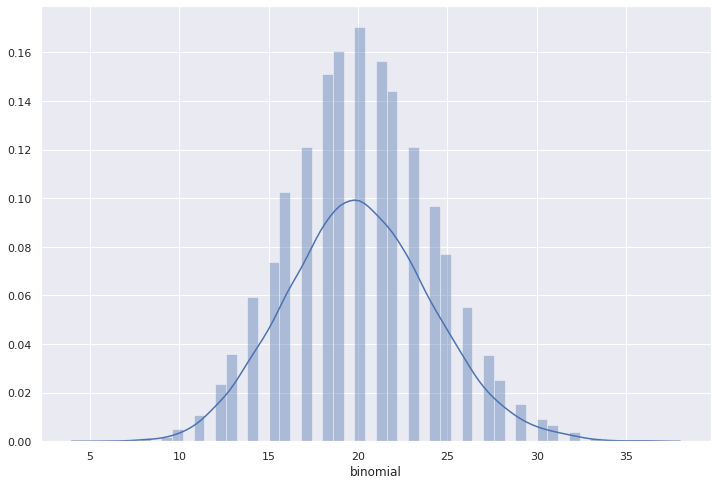

In [7]:
sns.distplot(dataframe.binomial)

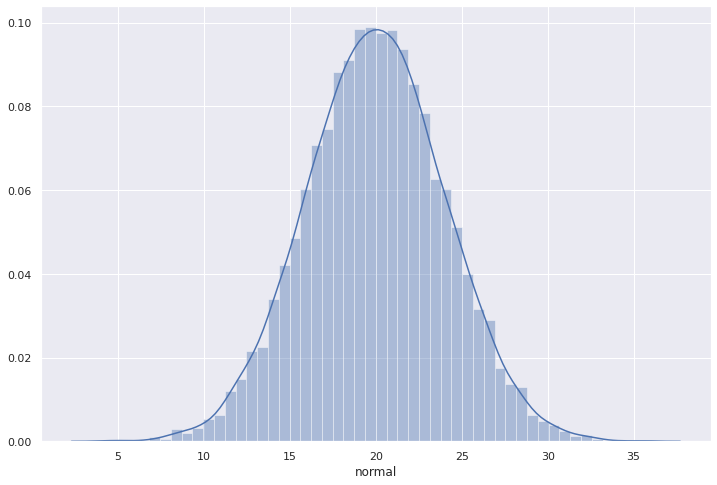

In [8]:
sns.distplot(dataframe.normal)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [12]:
def q1():
    df = dataframe.describe().copy()
    q1 = df.loc['25%', 'normal'] - df.loc['25%', 'binomial']
    q2 = df.loc['50%', 'normal'] - df.loc['50%', 'binomial']
    q3 = df.loc['75%', 'normal'] - df.loc['75%', 'binomial']
    return (round(q1, 3), round(q2, 3), round(q3, 3))
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [13]:
def q2():
    std = dataframe.normal.std()
    mean = dataframe.normal.mean()
    cdf_right = sct.norm.cdf(mean + std, loc=20, scale=4)
    cdf_left = sct.norm.cdf(mean - std, loc=20, scale=4)
    return float(round(cdf_right - cdf_left , 3))
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [14]:
def q3():
    m_binom, m_norm = dataframe.binomial.mean(), dataframe.normal.mean()
    v_binom, v_norm = dataframe.binomial.var(), dataframe.normal.var()
    return round(m_binom - m_norm, 3), round(v_binom - v_norm, 3)
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [2]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [3]:
# Sua análise da parte 2 começa aqui.
stars.dtypes

mean_profile    float64
sd_profile      float64
kurt_profile    float64
skew_profile    float64
mean_curve      float64
sd_curve        float64
kurt_curve      float64
skew_curve      float64
target             bool
dtype: object

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [4]:
def q4():
    #filtra mean_profile que não é pulsar
    false_pulsar_mean_profile = stars.loc[stars.target == False, 'mean_profile'].copy()
    
    #padroniza 'false_pulsar_mean_profile'
    z_score = lambda x: (x - x.mean()) / x.std()
    false_pulsar_mean_profile_standardized = z_score(false_pulsar_mean_profile)
    
    #cria ECDF de 'false_pulsar_mean_profile_standardized'
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    
    #encontra os quantis teóricos de uma distribuição normal média=0 e variância=1
    quantis = [sct.norm.ppf(it, loc=0, scale=1) for it in [0.8, 0.9, 0.95]]
    
    #calcula a probabilidade associada a cada quantil teórico utilizando a CDF
    #empírica de 'false_pulsar_mean_profile_standardized'
    p = lambda x: round(ecdf(x), 3)
    quantis_cdf = tuple([p(it) for it in quantis])
    
    return quantis_cdf
    
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [5]:
def q5():
    #filtra mean_profile que não é pulsar
    false_pulsar_mean_profile = stars.loc[stars.target == False, 'mean_profile'].copy()
    
    #padroniza 'false_pulsar_mean_profile'
    z_score = lambda x: (x - x.mean()) / x.std()
    false_pulsar_mean_profile_standardized = z_score(false_pulsar_mean_profile)
    
    #encontra os quantis Q1, Q2 e Q3 de 'false_pulsar_mean_profile_standardized'
    df = false_pulsar_mean_profile_standardized.describe().copy()
    q1 = df.loc['25%'] 
    q2 = df.loc['50%'] 
    q3 = df.loc['75%'] 
    
    #encontra os quantis teóricos de uma distribuição normal média=0 e variância=1
    q1_teorico = sct.norm.ppf(0.25, loc=0, scale=1)
    q2_teorico = sct.norm.ppf(0.50, loc=0, scale=1)
    q3_teorico = sct.norm.ppf(0.75, loc=0, scale=1)
    
    return round(q1 - q1_teorico, 3), round(q2 - q2_teorico, 3), round(q3 - q3_teorico, 3)
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.